# BERT [MASK] token 공격!

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)

BERT 모델은 [MASK] token을 잘 예측하기 위해 학습합니다.   
그래서 [MASK] token을 예측하는 task를 통해 개인정보를 획득할 수도 있습니다.


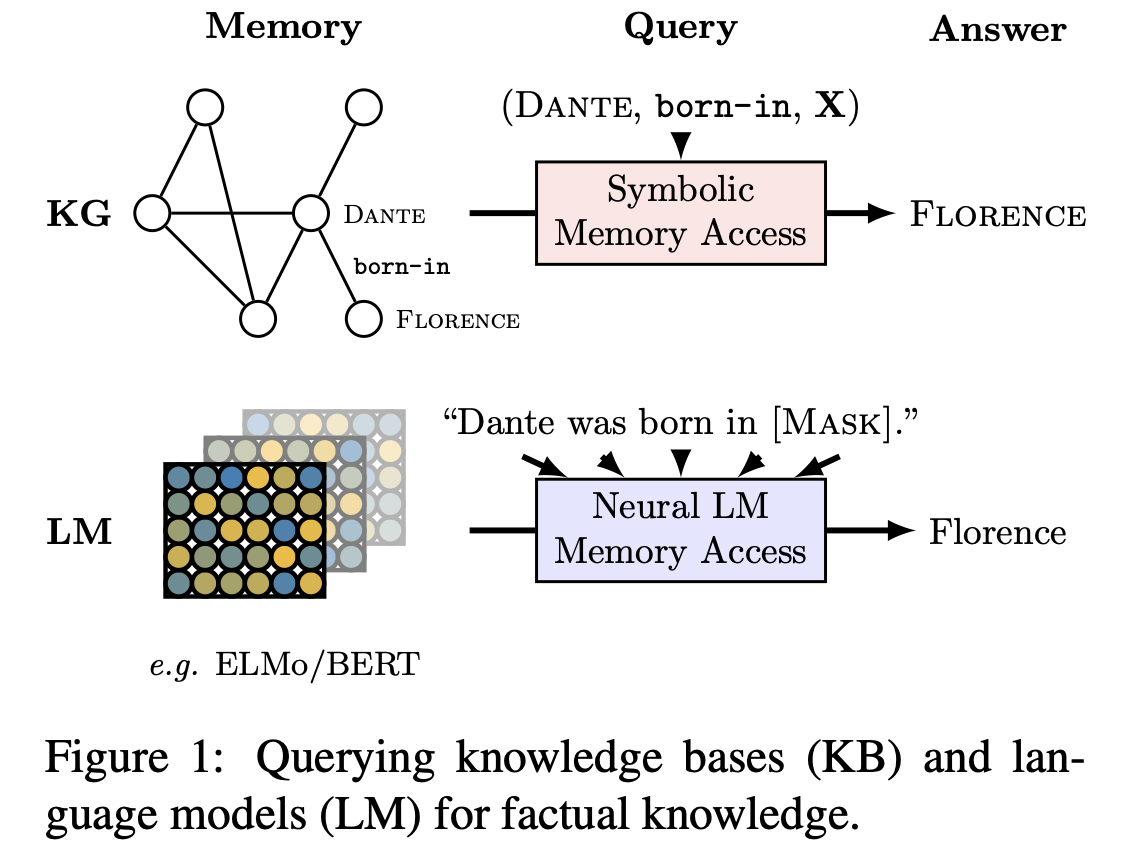

농담이 아니라, 이를 분석한 [논문](https://arxiv.org/pdf/1909.01066.pdfhttps://)도 있어요! :-)

In [1]:
!pip install transformers

     |████████████████████████████████| 2.1MB 10.0MB/s 
     |████████████████████████████████| 3.3MB 21.1MB/s 
     |████████████████████████████████| 901kB 50.1MB/s 


In [2]:
from transformers import BertForMaskedLM, AutoTokenizer

In [3]:
# Store the model we want to use
MODEL_NAME = "bert-base-multilingual-cased"

# We need to create the model and tokenizer
model = BertForMaskedLM.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


지겨우시겠지만, 반드시 tokenizer는 매 task마다 확인해주세요!!! :-)

In [4]:
print(tokenizer('이순신은 조선 중기의 무신이다.'))

{'input_ids': [101, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
from transformers import pipeline

In [6]:
nlp_fill = pipeline('fill-mask', top_k=5, model=model, tokenizer=tokenizer)

In [7]:
nlp_fill('Martin is living in [MASK].')

[{'score': 0.04413441941142082,
  'sequence': 'Martin is living in London.',
  'token': 10829,
  'token_str': 'London'},
 {'score': 0.016097432002425194,
  'sequence': 'Martin is living in Southampton.',
  'token': 45113,
  'token_str': 'Southampton'},
 {'score': 0.01311422511935234,
  'sequence': 'Martin is living in Italy.',
  'token': 11619,
  'token_str': 'Italy'},
 {'score': 0.012310952879488468,
  'sequence': 'Martin is living in a.',
  'token': 169,
  'token_str': 'a'},
 {'score': 0.010854917578399181,
  'sequence': 'Martin is living in Rome.',
  'token': 14592,
  'token_str': 'Rome'}]

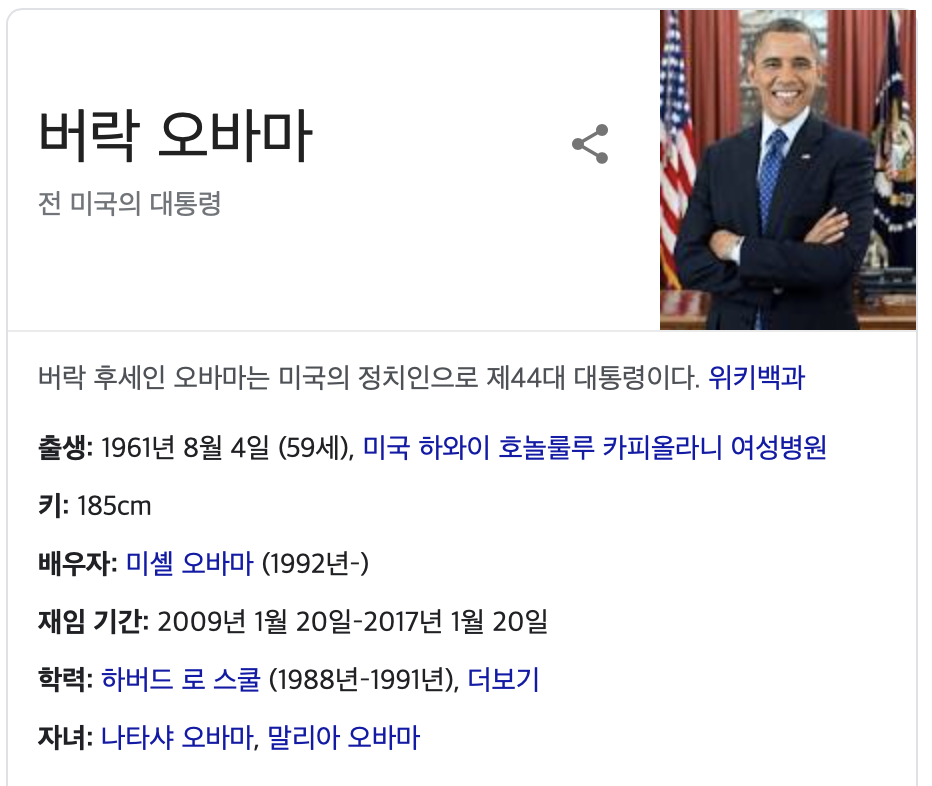

In [8]:

nlp_fill('Barack Hussein Obama graduated from [MASK] University.')

[{'score': 0.07715228945016861,
  'sequence': 'Barack Hussein Obama graduated from Harvard University.',
  'token': 16744,
  'token_str': 'Harvard'},
 {'score': 0.04509279131889343,
  'sequence': 'Barack Hussein Obama graduated from Georgetown University.',
  'token': 57543,
  'token_str': 'Georgetown'},
 {'score': 0.028830749914050102,
  'sequence': 'Barack Hussein Obama graduated from Northwestern University.',
  'token': 78396,
  'token_str': 'Northwestern'},
 {'score': 0.02869964763522148,
  'sequence': 'Barack Hussein Obama graduated from Lincoln University.',
  'token': 16944,
  'token_str': 'Lincoln'},
 {'score': 0.02225659042596817,
  'sequence': 'Barack Hussein Obama graduated from Boston University.',
  'token': 13683,
  'token_str': 'Boston'}]

In [9]:
nlp_fill('Obama was [MASK] of the United States.')

[{'score': 0.48057445883750916,
  'sequence': 'Obama was President of the United States.',
  'token': 12811,
  'token_str': 'President'},
 {'score': 0.05541132390499115,
  'sequence': 'Obama was president of the United States.',
  'token': 12931,
  'token_str': 'president'},
 {'score': 0.044774625450372696,
  'sequence': 'Obama was War of the United States.',
  'token': 11277,
  'token_str': 'War'},
 {'score': 0.02629113756120205,
  'sequence': 'Obama was part of the United States.',
  'token': 10668,
  'token_str': 'part'},
 {'score': 0.02169841341674328,
  'sequence': 'Obama was States of the United States.',
  'token': 10859,
  'token_str': 'States'}]

In [10]:
nlp_fill('Obama was born in [MASK], Hawaii.')

[{'score': 0.8043831586837769,
  'sequence': 'Obama was born in Honolulu, Hawaii.',
  'token': 56348,
  'token_str': 'Honolulu'},
 {'score': 0.16054971516132355,
  'sequence': 'Obama was born in Hawaii, Hawaii.',
  'token': 21729,
  'token_str': 'Hawaii'},
 {'score': 0.001997528364881873,
  'sequence': 'Obama was born in County, Hawaii.',
  'token': 10886,
  'token_str': 'County'},
 {'score': 0.001665070652961731,
  'sequence': 'Obama was born in Mesa, Hawaii.',
  'token': 25076,
  'token_str': 'Mesa'},
 {'score': 0.0008855816558934748,
  'sequence': 'Obama was born in Kai, Hawaii.',
  'token': 26387,
  'token_str': 'Kai'}]